#IS 470 Lab 6: Numeric Prediction--Regression Methods

---

In order for a health insurance company to make money, it needs to collect more
in yearly premiums than it spends on medical care to its beneficiaries. As a result, insurers invest a great deal of time and money in developing models that accurately forecast medical expenses for the insured population.<br>
<br>
Medical expenses are difficult to estimate because the most costly conditions are rare and seemingly random. Still, some conditions are more prevalent for certain segments of the population. For instance, lung cancer is more likely among smokers than non-smokers, and heart disease may be more likely among the obese.<br>
<br>
The goal of this analysis is to use patient data to estimate the average medical
care expenses for such population segments. These estimates can be used to create actuarial tables that set the price of yearly premiums higher or lower, 
depending on the expected treatment costs.<br>
<br>
The insurance data set has 1338 observations of 7 variables.
<br>
We will use this file to predict the medical expenses.
<br>
<br>
VARIABLE DESCRIPTIONS:<br>
age:	      age in years<br>
sex:	      gender<br>
bmi:	      body mass index<br>
children:	how many children do they have?<br>
smoker:	  do they smoke?<br>
region:	  geographic region<br>
expenses:	yearly medical expenses<br>
<br>
Target variable: **expenses**

### 1.Upload and clean data

In [1]:
# Upload data
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving insurance.csv to insurance.csv
User uploaded file "insurance.csv" with length 50264 bytes


In [2]:
# Import libraries
! pip install regressors
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from regressors import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12400 sha256=d18c70d4a0417a11edc8f1b2edfb34adabdd07f71e202ee3fae6b2cd51f8b085
  Stored in directory: /root/.cache/pip/wheels/5e/84/7d/c7f674a24c508709cdd3aa6cf0f129899f21061b2821ceed32
Successfully built regressors


In [3]:
# Read data
insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
# Show the head rows of a data frame
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
# Examine variable type
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [6]:
# Change categorical variables to "category"
insurance['sex'] = insurance['sex'].astype('category')
insurance['smoker'] = insurance['smoker'].astype('category')
insurance['region'] = insurance['region'].astype('category')

In [7]:
# Examine variable type
insurance.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
expenses     float64
dtype: object

Text(0.5, 1.0, 'Histogram of expenses in the insurance data set')

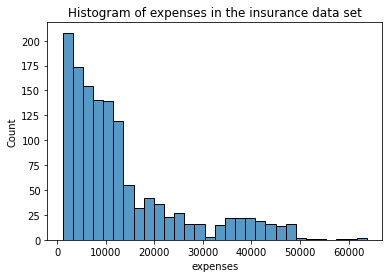

In [8]:
# Data exploration: some examples
# Histogram of insurance expenses
snsplot = sns.histplot(x='expenses', data = insurance)
snsplot.set_title("Histogram of expenses in the insurance data set")

In [9]:
# exploring relationships among all numeric variables: correlation matrix
insurance.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


### 2.Partition the data set for regression model

In [10]:
# Create dummy variables
insurance = pd.get_dummies(insurance, columns=['sex','smoker','region'], drop_first=True)
insurance

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0,0
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,1


In [11]:
# Partition the data
target = insurance['expenses']
predictors = insurance.drop(['expenses'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(936, 8) (402, 8) (936,) (402,)


Text(0.5, 1.0, 'Histogram of expenses in the training data set')

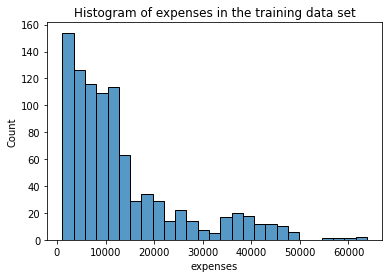

In [12]:
# Examine the distribution of target variable for training data set
snsplot = sns.histplot(data = target_train)
snsplot.set_title("Histogram of expenses in the training data set")

Text(0.5, 1.0, 'Histogram of expenses in the testing data set')

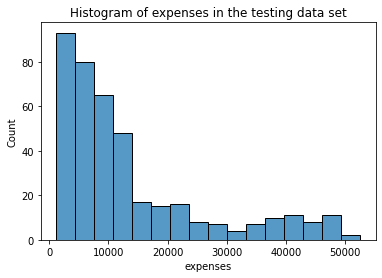

In [13]:
# Examine the distribution of target variable for testing data set
snsplot = sns.histplot(data = target_test)
snsplot.set_title("Histogram of expenses in the testing data set")

## 3.Simple linear regression

In [14]:
# Build a simple linear regression model with only bmi as predictor
model1 = linear_model.LinearRegression()
model1.fit(predictors_train[['bmi']], target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# Show model summary
predictor_names = predictors_train[['bmi']].columns.values
stats.summary(model1, predictors_train[['bmi']], target_train, predictor_names)

Residuals:
        Min        1Q     Median         3Q         Max
-49481.7796 -4689.504  3797.5184  8046.6149  19753.6216


Coefficients:
               Estimate   Std. Error  t value   p value
_intercept  2657.251940  1921.093525   1.3832  0.166934
bmi          343.876266    14.021460  24.5250  0.000000
---
R-squared:  0.03258,    Adjusted R-squared:  0.03154
F-statistic: 31.45 on 1 features


Q1. How the expenses change when we increase the bmi by 1? <br>
The expenses will be increased by 343.876266



In [16]:
# Make predictions on testing data
prediction_on_test = model1.predict(predictors_test[['bmi']])

In [17]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 9462.431449463487
RMSE: 12299.253726819521


## 4.Multiple linear regression

In [18]:
# Build a multiple linear regression model with all predictors
model2 = linear_model.LinearRegression()
model2.fit(predictors_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Show model summary
predictor_names = predictors_train.columns.values
stats.summary(model2, predictors_train, target_train, predictor_names)

Residuals:
        Min         1Q    Median        3Q         Max
-30302.4407 -1343.2315  985.6509  2988.446  11148.5211


Coefficients:
                      Estimate   Std. Error  t value   p value
_intercept       -11836.117831  1191.289921  -9.9355  0.000000
age                 256.402924    10.186903  25.1699  0.000000
bmi                 335.414456    16.372545  20.4864  0.000000
children            472.939931   166.843442   2.8346  0.004687
sex_male            -47.692891   400.980436  -0.1189  0.905348
smoker_yes        23435.046128   501.984750  46.6848  0.000000
region_northwest   -561.353117   545.419326  -1.0292  0.303645
region_southeast   -995.537125   551.901974  -1.8038  0.071580
region_southwest   -798.824371   541.710520  -1.4746  0.140648
---
R-squared:  0.73096,    Adjusted R-squared:  0.72864
F-statistic: 314.82 on 8 features


Q2. How the expenses change when we increase the bmi by 1? <br>
The expenses will be increased by 335.414456

Q3. Do you think bmi is important in predicting expenses? why? <br>
bmi is important in predicting expenses because its p value is lower than 0.05 (has low p value). Therefore, it is an important predictor.

In [20]:
# Make predictions on testing data
prediction_on_test = model2.predict(predictors_test)

In [21]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 4011.3808850910846
RMSE: 5773.7111375700415


## 5.Improving Model Performance:  Adding non-linear relationships

Add a higher-order "age" term

In [23]:
# add a higher-order "age" term
insurance['age2'] = insurance['age'] ** 2
insurance

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age2
0,19,27.9,0,16884.92,0,1,0,0,1,361
1,18,33.8,1,1725.55,1,0,0,1,0,324
2,28,33.0,3,4449.46,1,0,0,1,0,784
3,33,22.7,0,21984.47,1,0,1,0,0,1089
4,32,28.9,0,3866.86,1,0,1,0,0,1024
...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0,0,2500
1334,18,31.9,0,2205.98,0,0,0,0,0,324
1335,18,36.9,0,1629.83,0,0,0,1,0,324
1336,21,25.8,0,2007.95,0,0,0,0,1,441


In [24]:
# Partition the data
target = insurance['expenses']
predictors = insurance.drop(['expenses'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(936, 9) (402, 9) (936,) (402,)


In [25]:
# Build a linear regression model with non-linear relationships
model3 = linear_model.LinearRegression()
model3.fit(predictors_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# Show model summary
predictor_names = predictors_train.columns.values
stats.summary(model3, predictors_train, target_train, predictor_names)

Residuals:
        Min         1Q    Median         3Q         Max
-30897.6196 -1143.0599  976.6449  3010.6995  10996.9905


Coefficients:
                      Estimate   Std. Error  t value   p value
_intercept        -7946.613879  2024.274416  -3.9257  0.000093
age                  27.144543    49.795286   0.5451  0.585799
bmi                 333.788744    21.173262  15.7646  0.000000
children            591.183643   171.920444   3.4387  0.000610
sex_male            -70.422281   400.892935  -0.1757  0.860596
smoker_yes        23462.056874   502.406607  46.6993  0.000000
region_northwest   -526.692320   548.948589  -0.9595  0.337577
region_southeast   -967.924415   550.533067  -1.7582  0.079048
region_southwest   -781.301189   542.270220  -1.4408  0.149977
age2                  2.888628     0.108131  26.7142  0.000000
---
R-squared:  0.73257,    Adjusted R-squared:  0.72997
F-statistic: 281.85 on 9 features


In [32]:
# Make predictions on testing data
prediction_on_test = model3.predict(predictors_test)

In [33]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 3953.7602463146113
RMSE: 5707.448582070192


Add an interaction effect:

In [35]:
# add an indicator for BMI >= 30
insurance.loc[insurance['bmi'] >= 30, 'bmi30'] = 1
insurance.loc[insurance['bmi'] < 30, 'bmi30'] = 0
insurance['bmi30'] = insurance['bmi30'].astype('category')

In [36]:
# add an interaction effects bmi30*smoker
insurance['bmi30_smoker'] = insurance['bmi30'].astype(float) * insurance['smoker_yes'].astype(float)

In [37]:
insurance

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age2,bmi30,bmi30_smoker
0,19,27.9,0,16884.92,0,1,0,0,1,361,0.0,0.0
1,18,33.8,1,1725.55,1,0,0,1,0,324,1.0,0.0
2,28,33.0,3,4449.46,1,0,0,1,0,784,1.0,0.0
3,33,22.7,0,21984.47,1,0,1,0,0,1089,0.0,0.0
4,32,28.9,0,3866.86,1,0,1,0,0,1024,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0,0,2500,1.0,0.0
1334,18,31.9,0,2205.98,0,0,0,0,0,324,1.0,0.0
1335,18,36.9,0,1629.83,0,0,0,1,0,324,1.0,0.0
1336,21,25.8,0,2007.95,0,0,0,0,1,441,0.0,0.0


In [38]:
# Partition the data
target = insurance['expenses']
predictors = insurance.drop(['expenses'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(936, 11) (402, 11) (936,) (402,)


In [39]:
# Build a linear regression model with non-linear relationships
model4 = linear_model.LinearRegression()
model4.fit(predictors_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# Show model summary
predictor_names = predictors_train.columns.values
stats.summary(model4, predictors_train, target_train, predictor_names)

Residuals:
        Min      1Q     Median         3Q        Max
-24356.6801  818.38  1311.4334  1694.2262  4055.3453


Coefficients:
                      Estimate   Std. Error  t value   p value
_intercept        -1334.525875  1638.900791  -0.8143  0.415691
age                  45.644502    38.078226   1.1987  0.230947
bmi                 124.927286    17.127101   7.2941  0.000000
children            602.951131   127.997651   4.7106  0.000003
sex_male           -323.859152   298.512453  -1.0849  0.278241
smoker_yes        13444.538555   471.284949  28.5274  0.000000
region_northwest   -565.712615   408.660324  -1.3843  0.166594
region_southeast  -1022.186642   409.954486  -2.4934  0.012824
region_southwest  -1158.326763   403.636849  -2.8697  0.004201
age2                  2.808353     0.080626  34.8318  0.000000
bmi30             -1000.934145   483.373489  -2.0707  0.038658
bmi30_smoker      20016.357007   701.429309  28.5365  0.000000
---
R-squared:  0.85189,    Adjusted R-squared: 

In [42]:
# Make predictions on testing data
prediction_on_test = model4.predict(predictors_test)

In [43]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 2309.1294296071137
RMSE: 4097.094074358147


Q4. Compared to the previous model (model2), does this model (model4) has better performance? why?<br>
<br>
Compared to model 2, this model (model 4) has much better performance. This is because when you compare their evaluation results of the two models on the testing data, model 4 has lower MAE and RMSE statistics. This means that the model 4 results in less and smaller errors.


## 6.Regression Tree

In [47]:
# Partition the data
insurance.insurance.drop(['age2', 'bmi30','bmi30_smoker'], axis=1)
target = insurance['expenses']
predictors = insurance.drop(['expenses'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)


(936, 8) (402, 8) (936,) (402,)


In [48]:
# Build a regression tree model with max_depth=3
model5= DecisionTreeRegressor(random_state=0, max_depth=3 )
model5.fit(predictors_train, target_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

[Text(837.0, 951.3000000000001, 'smoker_yes <= 0.5\nmse = 140986232.992\nsamples = 936\nvalue = 13232.917'),
 Text(418.5, 679.5, 'age <= 42.5\nmse = 37737689.343\nsamples = 746\nvalue = 8616.732'),
 Text(209.25, 407.70000000000005, 'age <= 26.5\nmse = 22225840.036\nsamples = 407\nvalue = 5418.786'),
 Text(104.625, 135.89999999999998, 'mse = 21407146.41\nsamples = 177\nvalue = 3657.79'),
 Text(313.875, 135.89999999999998, 'mse = 18632806.318\nsamples = 230\nvalue = 6773.987'),
 Text(627.75, 407.70000000000005, 'age <= 51.5\nmse = 29341634.547\nsamples = 339\nvalue = 12456.154'),
 Text(523.125, 135.89999999999998, 'mse = 24590721.601\nsamples = 141\nvalue = 10446.126'),
 Text(732.375, 135.89999999999998, 'mse = 27798883.343\nsamples = 198\nvalue = 13887.537'),
 Text(1255.5, 679.5, 'bmi <= 29.95\nmse = 134204999.764\nsamples = 190\nvalue = 31357.516'),
 Text(1046.25, 407.70000000000005, 'age <= 41.0\nmse = 25603580.987\nsamples = 96\nvalue = 21353.204'),
 Text(941.625, 135.89999999999998,

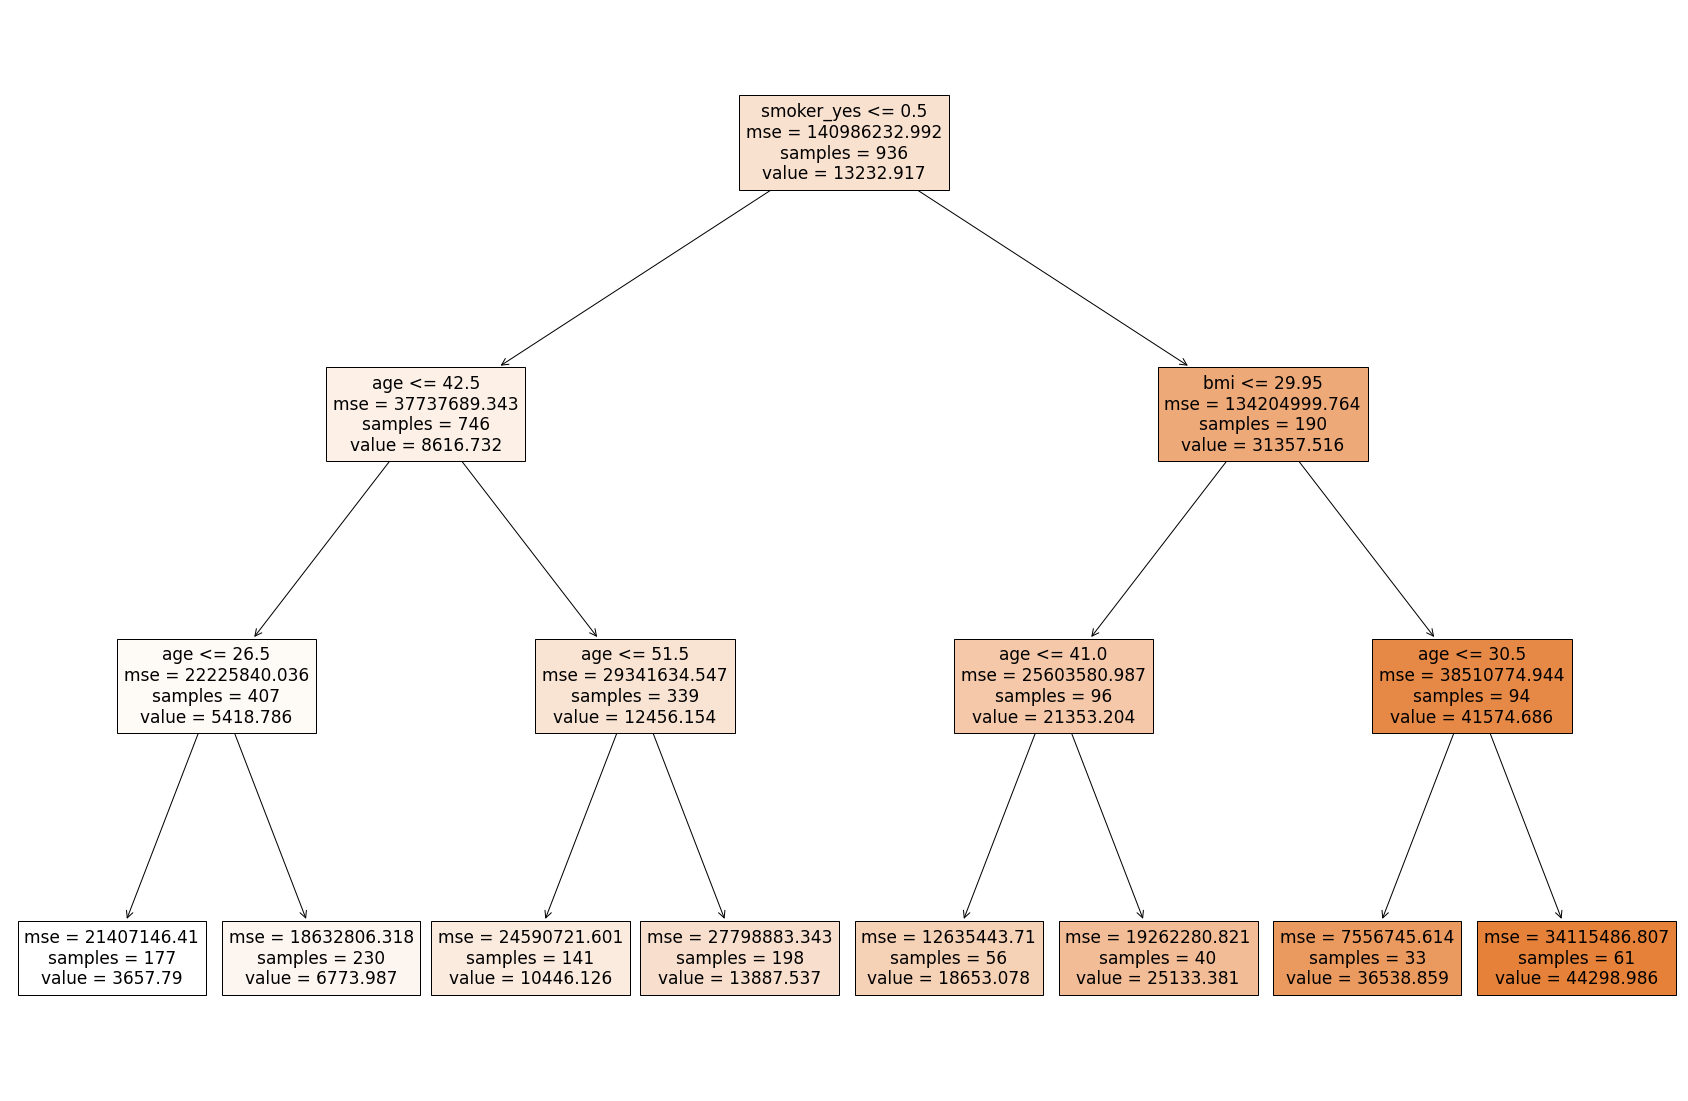

In [51]:
# plot the tree
from matplotlib import pyplot as plt 
from sklearn import tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model5,
               feature_names=list(predictors_train.columns),
               filled=True)

In [52]:
# Make predictions on testing data
prediction_on_test=model5.predict(predictors_test)

In [53]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 2717.5186416559495
RMSE: 4462.881172027449


***Download the html file and submit to BeachBoard***<br>
<br>
1.   ***Download the lab6.ipynb file***
2.   ***Upload the lab6.ipynb file***
3.   ***Run the code below to generate a html file***
4.   ***Download the html file and submit to BeachBoard***

In [54]:
!jupyter nbconvert --to html IS470_lab6.ipynb

[NbConvertApp] Converting notebook IS470_lab6.ipynb to html
[NbConvertApp] Writing 636525 bytes to IS470_lab6.html
